<h1>Import Modules</h1>

In [0]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Plotting imports and settings
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (13,8)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['figure.figsize'] = [10, 5]

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = "/content/drive/My Drive/Data/CleanData.xlsx"

In [0]:
df1 = pd.read_excel(path,sheet_name=0) # Year 2009-2010

In [0]:
df1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [0]:
df1 = df1.loc[:, ~df1.columns.str.contains('^Unnamed')]

In [0]:
df2 = pd.read_excel(path,sheet_name=1) # Year 2010-2011

In [0]:
df2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [0]:
df2 = df2.loc[:, ~df2.columns.str.contains('^Unnamed')]

<h2> Combining Year1 and Year2 data in one Dataframe</h2>

In [0]:
df = df1.append(df2, sort=False)
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [0]:
df['total_cost'] = df['Quantity'] * df['Price']
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,total_cost
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


<h2> Removing duplicates</h2>

In [0]:
df.duplicated().sum()

19313

In [0]:
# Removing duplicate entries :
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [0]:
#Deleting special code products as they don't count towards sale
df['StockCode']=df.StockCode.astype('str')
list_special_codes = df[df['StockCode'].str.contains('^[a-zA-Z]+', regex = True)]['StockCode'].unique()
list_special_codes

array([], dtype=object)

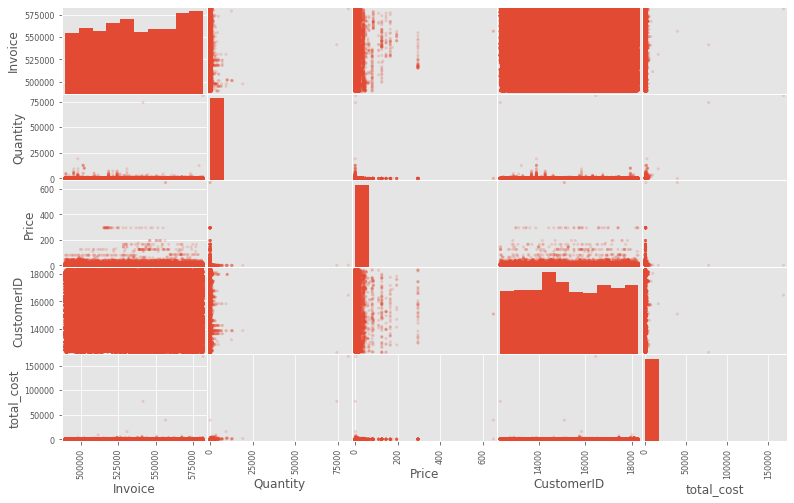

In [0]:
pd.plotting.scatter_matrix(df, alpha=0.2);
plt.show()

<h1> Implementing Kmeans to to divide our cutomers into key groups 

In [0]:
#grouping the data by customers and preparing for segmentation
Data = df.copy()
Data['Country'] = Data['Country'].map(lambda x: 'UK' if x=='UNITED KINGDOM' else 'non-UK')
CustomerData = Data.groupby(['CustomerID','Country'], sort=False).agg({'Quantity':'mean','Price':'mean','Invoice':'nunique','Description':'nunique'})
CustomerData.reset_index(inplace=True)
CustomerData.columns = ['CustomerID', 'UK?', 'Average Quantity', 'Average Price', 'Repeats', 'Product Variety']
CustomerData.head()

,CustomerID,UK?,Average Quantity,Average Price,Repeats,Product Variety
0,13085,non-UK,11.238095,3.561071,8,51
1,13078,non-UK,15.211125,3.887446,57,164
2,15362,non-UK,9.200000,3.612000,2,38
3,18102,non-UK,174.658654,3.794740,145,413
4,12682,non-UK,11.051010,2.879957,51,370


In [0]:
#dropping categorical variable
CustomerData=CustomerData.drop(columns=['UK?'])

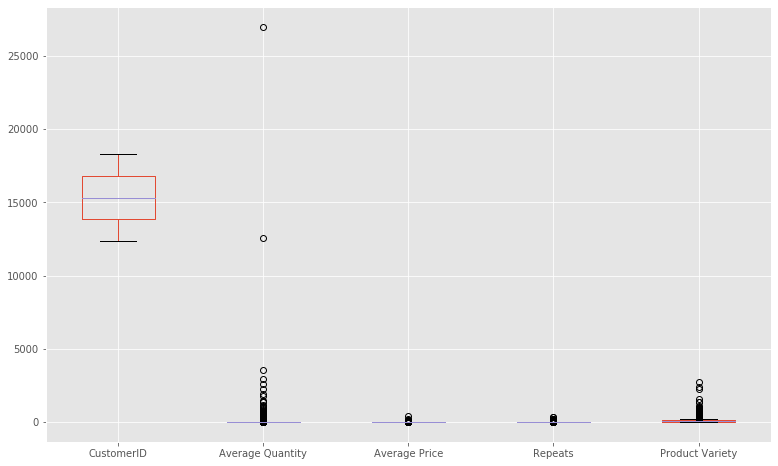

In [0]:
pd.plotting.boxplot(CustomerData)

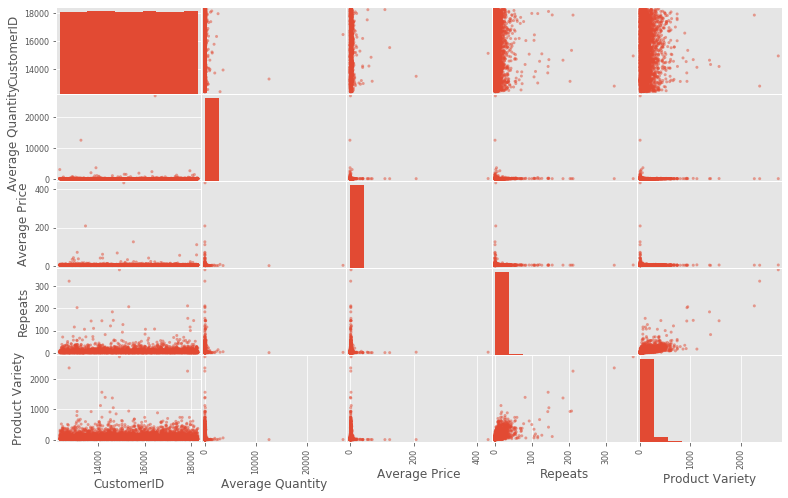

In [0]:
pd.plotting.scatter_matrix(CustomerData);

In [0]:
# Key hyperparameters
true_k =4         # desired number of clusters
colors = 'bgrykcm'  # colors for each cluster (b is blue, g is grey and so on)
dim_features = 4   # dimensionality of feature space
num_points = 40 

In [0]:
X=CustomerData
X = StandardScaler().fit_transform(X)
kmeans = KMeans(n_clusters=true_k, random_state=0)
kmeans.fit(X)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [0]:
kmeans.cluster_centers_

array([[-8.70337522e-01, -3.85720309e-03, -5.70403924e-03,
         2.60826348e-02,  1.94616879e-02],
       [ 8.60647585e-01, -1.89980133e-02,  5.72508165e-03,
        -2.56855546e-02, -1.90232370e-02],
       [ 6.56993966e-01,  6.71166162e+01, -2.44436014e-01,
        -3.33565604e-01, -6.67148353e-01]])

In [0]:
kmeans.labels_

array([0, 0, 1, ..., 1, 0, 0], dtype=int32)

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


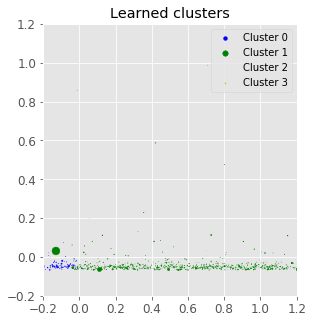

In [0]:
plt.subplot(1, 2, 2)
for k in range(true_k):
    X_cluster = X[kmeans.labels_ == k]
    plt.scatter(X_cluster[:, 0], X_cluster[:, 1], X_cluster[:, 2], c=colors[k])
plt.title("Learned clusters")
plt.xlim(-0.2,1.2)
plt.ylim(-0.2,1.2)
plt.legend([f"Cluster {i}" for i in range(len(colors))])
plt.show()

In [0]:
def get_inertia(X, kmeans):
    ''' This function returns the exact same value as the attribute inertia_ of kmeans'''
    inertia = 0
    for i in range(X.shape[0]):
        inertia = inertia + np.linalg.norm(X[i] - kmeans.cluster_centers_[kmeans.labels_[i]])**2
    return inertia

In [0]:
kmeans.inertia_

20368.453009648278

In [0]:
def get_inertia2(X, kmeans):
    ''' This function is analogous to get_inertia, but with respect to the 2nd closest center, rather than closest one'''
    closest_index = 1
    if len(kmeans.cluster_centers_) == 1:
        closest_index = 0  # in case only one cluster is found
    
    inertia2 = 0
    for i in range(X.shape[0]):
        dist_to_center = sorted([np.linalg.norm(X[i] - center)**2 
                                 for center in kmeans.cluster_centers_])[closest_index]
        inertia2 = inertia2 + dist_to_center
    return inertia2

In [0]:
get_inertia2(X, kmeans)

42437.133017704706

In [0]:
get_inertia(X, kmeans) / get_inertia2(X, kmeans)

0.47996769718516696

In [0]:
silhouette_score(X, kmeans.labels_)

0.36608294292862775

In [0]:
inertias_1 = []
inertias_2 = []
silhouette_avgs = []

max_k = 15
for k in np.arange(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)  
    inertias_1.append(kmeans.inertia_)
    inertias_2.append(get_inertia2(X, kmeans))
    print(f"[k {k: >2}]",
          f"interia: {inertias_1[-1]: >6.2f},",
          f"inertia2: {inertias_2[-1]: >6.2f},",
          f"ratio: {inertias_1[-1] / inertias_2[-1]:.2f}")

    if k == 1:
        silhouette_avgs.append(0)
    else:
        silhouette_avgs.append(silhouette_score(X, kmeans.labels_))

[k  1] interia: 29265.00, inertia2: 29265.00, ratio: 1.00
[k  2] interia: 24758.54, inertia2: 26405563.59, ratio: 0.00
[k  3] interia: 20368.45, inertia2: 42437.13, ratio: 0.48
[k  4] interia: 16150.29, inertia2: 41618.57, ratio: 0.39
[k  5] interia: 11826.82, inertia2: 41522.10, ratio: 0.28
[k  6] interia: 9011.41, inertia2: 39928.00, ratio: 0.23
[k  7] interia: 8280.51, inertia2: 29394.01, ratio: 0.28
[k  8] interia: 7450.17, inertia2: 32440.83, ratio: 0.23
[k  9] interia: 6484.92, inertia2: 31065.88, ratio: 0.21
[k 10] interia: 5792.44, inertia2: 22906.99, ratio: 0.25
[k 11] interia: 5166.08, inertia2: 21255.20, ratio: 0.24
[k 12] interia: 4616.99, inertia2: 20221.69, ratio: 0.23
[k 13] interia: 4210.35, inertia2: 18922.40, ratio: 0.22
[k 14] interia: 3820.44, inertia2: 18020.72, ratio: 0.21
[k 15] interia: 3580.28, inertia2: 17291.04, ratio: 0.21


In [0]:
k = 1
for avg in silhouette_avgs:
    print(f"[k {k: >2}] silhouette: {avg:.2f}")
    k += 1

[k  1] silhouette: 0.00
[k  2] silhouette: 0.97
[k  3] silhouette: 0.37
[k  4] silhouette: 0.40
[k  5] silhouette: 0.41
[k  6] silhouette: 0.42
[k  7] silhouette: 0.31
[k  8] silhouette: 0.42
[k  9] silhouette: 0.42
[k 10] silhouette: 0.33
[k 11] silhouette: 0.33
[k 12] silhouette: 0.35
[k 13] silhouette: 0.35
[k 14] silhouette: 0.35
[k 15] silhouette: 0.36


In [0]:
k_range = np.arange(1, max_k + 1)
metrics = np.zeros([len(k_range), 3])
for i, k in enumerate(k_range):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    metrics[i, 0] = kmeans.inertia_ 
    metrics[i, 1] = get_inertia2(X, kmeans)
    if k == 1: continue
    metrics[i, 2] = silhouette_score(X, kmeans.labels_)

In [0]:
k_range = np.arange(1, max_k + 1)

def plot_metrics(inertias_1, inertias_2, silhouette_avgs):
    plt.figure(figsize=(20, 5))

    plt.subplot(1,3,1)
    plt.title("Inertia (sum square distances within cluster)")
    plt.plot(k_range, inertias_1)
    plt.xticks(k_range)
    plt.xlabel('Number of clusters')
    plt.grid()

    plt.subplot(1,3,2)    
    plt.title("Ratio: Inertia / Inertia2 (sum square distances to 2nd closest cluster)")
    plt.plot(k_range, np.array(inertias_1) / np.array(inertias_2))
    plt.xticks(k_range)
    plt.xlabel('Number of clusters')
    plt.grid()

    plt.subplot(1,3,3)  
    plt.title("Average Silhouette")
    plt.plot(k_range, silhouette_avgs)
    plt.xticks(k_range)
    plt.xlabel('Number of clusters')
    plt.grid()



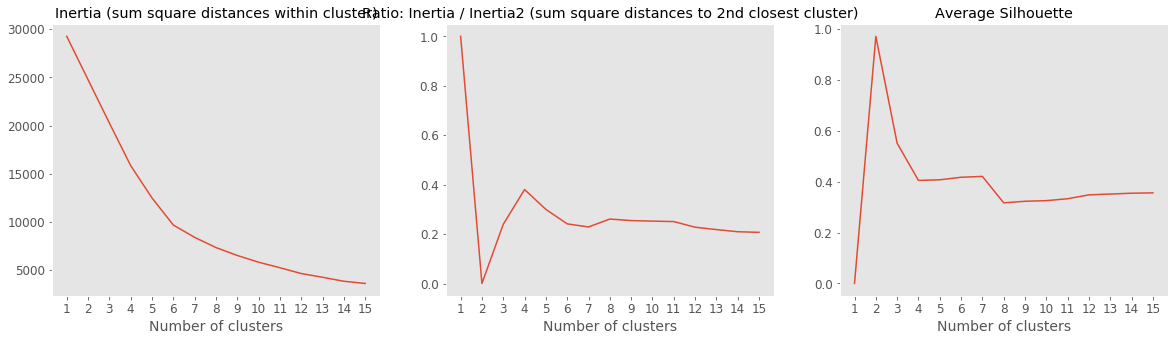

In [0]:
plot_metrics(metrics[:, 0], metrics[:, 1], metrics[:, 2])

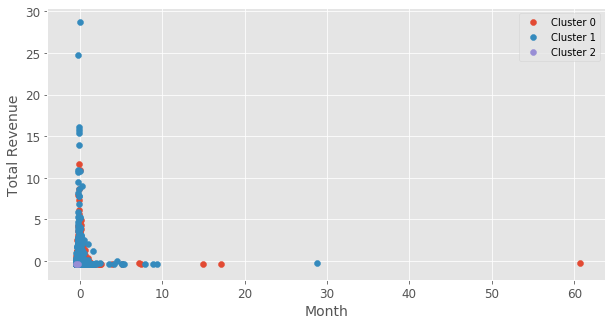

In [0]:
kmeans = KMeans(n_clusters=3).fit(X)
for c in range(3):
    cluster_mask = kmeans.labels_ == c
    plt.scatter(X[cluster_mask, 2], X[cluster_mask, 3], label=f"Cluster {c}")
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total Revenue", fontsize=14)
plt.legend();

In [98]:
{i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}

{0: array([   2,    3,    5, ..., 5843, 5847, 5850]),
 1: array([   0,    1,    4, ..., 5849, 5851, 5852]),
 2: array([4867, 5801])}

<h1>Conclusion</h1>To summarize our analysis made so far: in the whole population of the customers, looks like bigger percentage  of them were ordinary shoppers with reasonable spending and frequency, Cluter [1] customers represents medium to high profit, and rest of them in cluster[2] cent were extremely highly profit customers